In [1]:
!pip install gravis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
!pip install networkx

In [2]:
import networkx as nx

In [3]:
import networkx as nx
import numpy as np
import uuid
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl

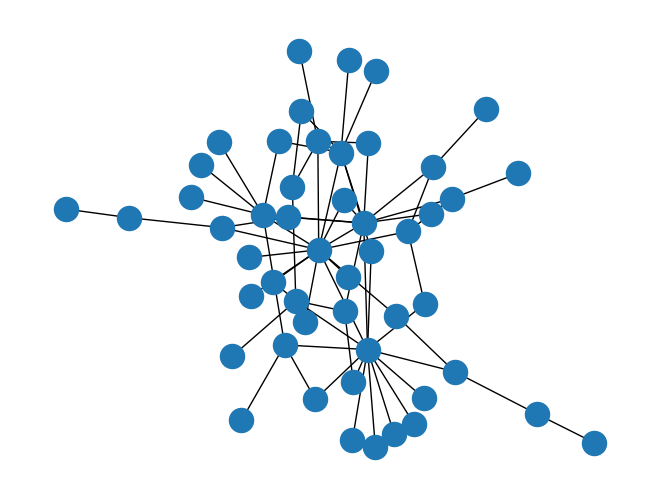

In [4]:
def get_new_test_graph():
    NUM_NODES = 50
    p = 0.5
    seed = 1
    test_graph = nx.dual_barabasi_albert_graph(n=NUM_NODES, p=p, seed=seed, m1=2, m2=1)

    # append node properties
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
        data['node_identifier'] = str(uuid.uuid4())
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

    # append edge properties
    for _, _, data in test_graph.edges(data=True):
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)

    return test_graph

test_graph = get_new_test_graph()
nx.draw(test_graph)

In [5]:
class MplColorHelper:

    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

    def get_rgba(self, val):
        return self.scalarMap.to_rgba(val, bytes=True)

    def get_rgb_str(self, val):
        r, g, b, a = self.get_rgba(val)
        return f"rgb({r},{g},{b})"

In [6]:
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
cm_name = "winter"
node_colors = MplColorHelper(cm_name, betweenness_min, betweenness_max)

vals = nx.get_edge_attributes(test_graph, 'feature1').values()
val_min, val_max = min(vals), max(vals)
edge_colors = MplColorHelper(cm_name, val_min, val_max)

for node, data in test_graph.nodes(data=True):
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])
    data['click'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']:.3f}" +
        f"\nfeature 2: {data['feature2']:.3f}" +
        f"\nfeature 3: {data['feature3']:.3f}" +
        f"\nBetweenness Centrality: {data['betweenness_centrality']:.3f}" +
        f"\nDegree: {data['degree']}"
    )

for u, v, data in test_graph.edges(data=True):
    data['color'] = edge_colors.get_rgb_str(data['feature1'])
    data['click'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" +
        f"\nfeature 1: {data['feature1']}" +
        f"\nfeature 2: {data['feature2']}"
    )

In [7]:
import gravis as gv

gv.d3(
    test_graph,

    graph_height=750,

    node_size_data_source="betweenness_centrality",
    use_node_size_normalization=True,
    node_size_normalization_min=15,
    node_size_normalization_max=35,
    show_node_label=True,
    node_label_data_source='node_identifier',

    edge_size_data_source='feature1',
    use_edge_size_normalization=True,
    edge_size_normalization_min=1,
    edge_size_normalization_max=5,

    many_body_force_strength=-500
)

In [8]:
def get_new_test_digraph():
    NUM_NODES = 50
    test_graph = nx.scale_free_graph(n=NUM_NODES, seed=0, alpha=0.5, beta=0.2, gamma=0.3)

    # append node properties
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):

        data['node_type'] = 0 if node < 25 else 1

        data['node_identifier'] = str(uuid.uuid4())
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

    # append edge properties
    for u, v, data in test_graph.edges(data=True):
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)

    return test_graph

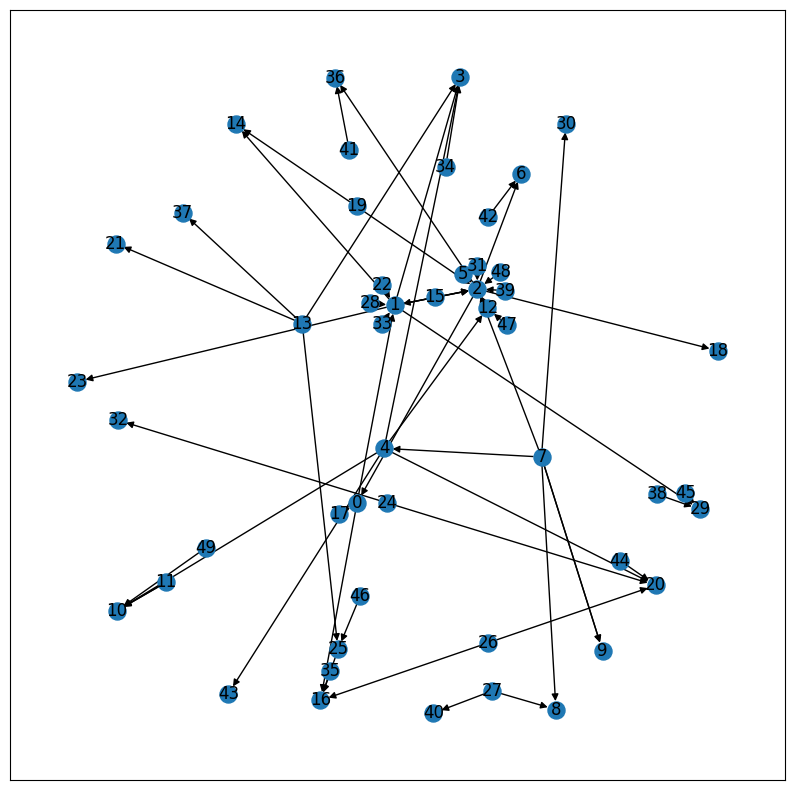

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
test_graph = get_new_test_digraph()
nx.draw_networkx(test_graph, node_size=150)

In [10]:
# prep node color generator
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
cm_name = "winter"
node_colors = MplColorHelper(cm_name, betweenness_min, betweenness_max)

for node, data in test_graph.nodes(data=True):
    data['value'] = data['betweenness_centrality'] # node size
    data['label'] = data['node_identifier']
    data['title'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']}" +
        f"\nfeature 2: {data['feature2']}" +
        f"\nfeature 3: {data['feature3']}" +
        f"\nBetweenness Centrality: {data['betweenness_centrality']}" +
        f"\nDegree: {data['degree']}"
    )
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])
    data['shape'] = 'dot' if data['node_type'] == 0 else 'triangle'

for u, v, data in test_graph.edges(data=True):
    # data['value'] = data['feature1']
    data['color'] = edge_colors.get_rgb_str(data['feature1'])
    data['title'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" +
        f"\nfeature 1: {data['feature1']}" +
        f"\nfeature 2: {data['feature2']}"
    )

In [11]:
import gravis as gv

gv.d3(
    test_graph,

    graph_height=700,

    node_size_data_source="betweenness_centrality",
    use_node_size_normalization=True,
    node_size_normalization_min=15,
    node_size_normalization_max=35,
    show_node_label=False,
    node_label_data_source='node_identifier',

    edge_size_data_source='feature1',
    use_edge_size_normalization=True,
    edge_size_normalization_min=1,
    edge_size_normalization_max=5,
    edge_curvature=-0.5,

    many_body_force_strength=-500
)

In [12]:
import pandas as pd

# Define the heads, relations, and tails
head = ['drugA', 'drugB', 'drugC', 'drugD', 'drugA', 'drugC', 'drugD', 'drugE', 'gene1', 'gene2','gene3', 'gene4', 'gene50', 'gene2', 'gene3', 'gene4']
relation = ['treats', 'treats', 'treats', 'treats', 'inhibits', 'inhibits', 'inhibits', 'inhibits', 'associated', 'associated', 'associated', 'associated', 'associated', 'interacts', 'interacts', 'interacts']
tail = ['fever', 'hepatitis', 'bleeding', 'pain', 'gene1', 'gene2', 'gene4', 'gene20', 'obesity', 'heart_attack', 'hepatitis', 'bleeding', 'cancer', 'gene1', 'gene20', 'gene50']

# Create a dataframe
df = pd.DataFrame({'head': head, 'relation': relation, 'tail': tail})
df

,head,relation,tail
0,drugA,treats,fever
1,drugB,treats,hepatitis
2,drugC,treats,bleeding
3,drugD,treats,pain
4,drugA,inhibits,gene1
5,drugC,inhibits,gene2
6,drugD,inhibits,gene4
7,drugE,inhibits,gene20
8,gene1,associated,obesity
9,gene2,associated,heart_attack


In [13]:
# Create a knowledge graph
G = nx.Graph()
for _, row in df.iterrows():
  G.add_edge(row['head'], row['tail'], label=row['relation'])

In [21]:
# Create a knowledge graph
G2 = nx.DiGraph(directed=True)
for _, row in df.iterrows():
  G2.add_edge(row['head'], row['tail'], label=row['relation'])



In [22]:
import gravis as gv

gv.d3(
    G2,

    graph_height=700,

    node_size_data_source="betweenness_centrality",
    use_node_size_normalization=True,
    node_size_normalization_min=15,
    node_size_normalization_max=35,
    show_node_label=False,
    node_label_data_source='node_identifier',

    edge_size_data_source='feature1',
    use_edge_size_normalization=True,
    edge_size_normalization_min=1,
    edge_size_normalization_max=5,
    edge_curvature=-0.5,

    many_body_force_strength=-500
)

In [23]:

import gravis as gv

gv.d3(
    G2,

    graph_height=250,

    node_size_data_source="betweenness_centrality",
    use_node_size_normalization=True,
    node_size_normalization_min=15,
    node_size_normalization_max=35,
    show_node_label=True,
    node_label_data_source='node_identifier',

    edge_size_data_source='feature1',
    use_edge_size_normalization=True,
    edge_size_normalization_min=1,
    edge_size_normalization_max=5,

    many_body_force_strength=-500
)

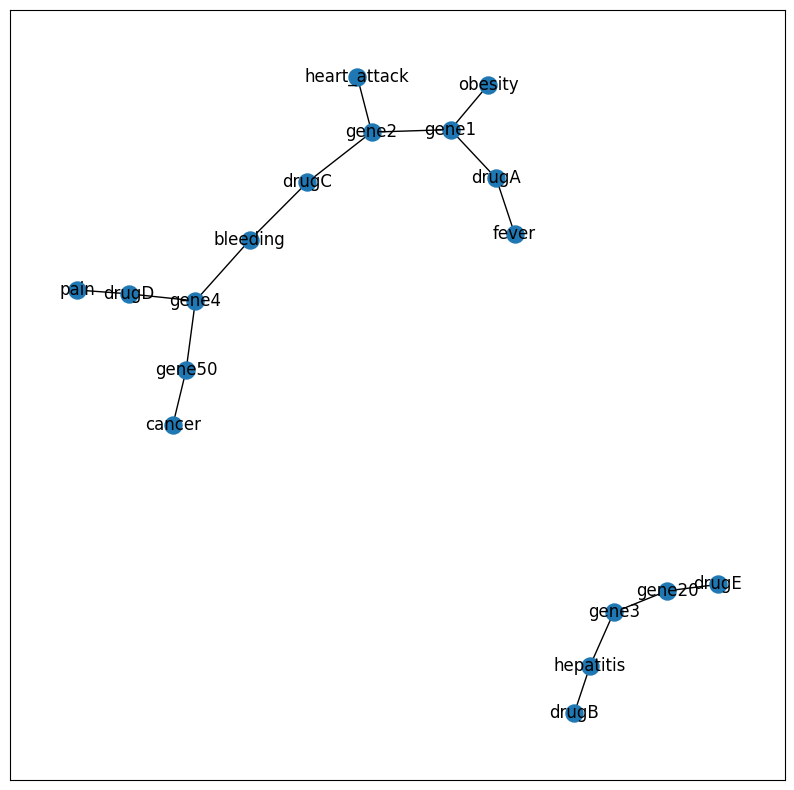

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
test_graph = get_new_test_digraph()
nx.draw_networkx(G, node_size=150)